<h1>3. Data Preparation</h1>

After you understand the data you have, it is time for the Data Preparation. This phase is what we did to prepare the data for the modeling phase. 

<h2>3.1 Feature Engineering</h2>

Create a new data from existing data. Create time features. Create new feature from Service fees. 

Total amount of transactions fees is: 88544.0. <b>The goal is to keep this fee low.</b> 
 - 49045.0 on failed transactions 
 - 39499.0 on succesfull transactions 
 
The most failed transaction have fee: 1.0
The most sucess transaction have fee: 3.0

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

transactions = pd.read_csv('datasets/PSP_Jan_Feb_2019.csv')
transactions.head()
print(transactions.shape)

(50410, 8)


In [2]:
transactions['tmsp'] = pd.to_datetime(transactions['tmsp'])
transactions['date'] = transactions['tmsp'].dt.date
transactions['weekday'] = transactions['tmsp'].dt.weekday
transactions['hour'] = transactions['tmsp'].dt.hour
display(transactions.head())

,id,tmsp,country,amount,success,PSP,3D_secured,card,date,weekday,hour
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,2019-01-01,1,0
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,2019-01-01,1,0
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,2019-01-01,1,0
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,2019-01-01,1,0
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,2019-01-01,1,0


<h2>3.2 Data Formatting</h2>

Encoding categorical features. Standard Scaler transformation. 

First, we will be converting all the non-numeric values into numeric ones. We do this because not only it results in a faster computation but also many machine learning models (like XGBoost) (and especially the ones developed using scikit-learn) require the data to be in a strictly numeric format. We will do this by using a technique called label encoding.

In [3]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le=LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in transactions.columns.to_numpy():
    # Compare if the dtype is object
    if transactions[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        transactions[col]=le.fit_transform(transactions[col])
        
display(transactions.head())

,id,tmsp,country,amount,success,PSP,3D_secured,card,date,weekday,hour
0,0,2019-01-01 00:01:11,1,89,0,3,0,2,0,1,0
1,1,2019-01-01 00:01:17,1,89,1,3,0,2,0,1,0
2,2,2019-01-01 00:02:49,1,238,0,3,1,0,0,1,0
3,3,2019-01-01 00:03:13,1,238,1,3,1,0,0,1,0
4,4,2019-01-01 00:04:33,0,124,0,2,0,0,0,1,0


<h2>3.3 Data Selection</h2>

Selecting the dataset, columns, and/or rows you would use. When you exclude data, make sure you have a valid explanation. The way you filter data should reflect the business question as well. Train test split.

Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to scale the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then apply the scaling.

As expected, after scaling, all data now has mean 0, std deviation 1.

In [4]:
# Import train_test_split
from sklearn.model_selection import train_test_split

transactions_data = transactions.drop(['id', 'tmsp','date'], axis=1)

# Create train and test sets
train, test = train_test_split(transactions_data, test_size=0.2, random_state=42)

In [5]:
# Train: X and y split
X_train = train.drop('success', axis=1)
y_train = train[['success']]
display(X_train.head())
display(y_train.head())

,country,amount,PSP,3D_secured,card,weekday,hour
31154,2,399,2,0,1,1,15
25663,1,260,2,1,1,3,4
30963,2,181,2,0,2,1,11
37731,1,217,2,0,1,1,23
15297,2,279,2,0,1,3,13


,success
31154,0
25663,0
30963,0
37731,0
15297,0


In [6]:
# Train: X and y split
X_test = test.drop('success', axis=1)
y_test = test[['success']]
display(X_test.head())
display(y_test.head())

,country,amount,PSP,3D_secured,card,weekday,hour
5087,0,215,3,0,1,5,14
22530,1,240,2,0,0,6,4
15518,2,382,3,1,1,3,20
3418,1,32,3,1,1,3,21
36168,0,211,3,0,1,0,8


,success
5087,0
22530,0
15518,0
3418,0
36168,0


In [7]:
# Import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler and use it to rescale X_train and X_test
scaler = StandardScaler()
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

display(rescaledX_train)

X_train_e_l_n = pd.DataFrame(data=rescaledX_train, index=X_train.index, columns=X_train.columns)    
X_test_e_l_n = pd.DataFrame(data=rescaledX_test, index=X_test.index, columns=X_test.columns) 

display(X_train_e_l_n.describe())

array([[ 1.5660541 ,  2.03758259, -0.24824634, ..., -0.05561389,
        -0.91902061,  0.50705327],
       [-0.01553034,  0.59686441, -0.24824634, ..., -0.05561389,
         0.12357709, -1.08248858],
       [ 1.5660541 , -0.22196103, -0.24824634, ...,  1.4773984 ,
        -0.91902061, -0.07096195],
       ...,
       [-0.01553034, -1.18589477,  0.81148464, ..., -1.58862618,
        -0.39772176, -0.35996956],
       [ 1.5660541 ,  1.43641961,  0.81148464, ...,  1.4773984 ,
        -0.91902061,  0.65155708],
       [ 1.5660541 ,  0.53467514,  0.81148464, ..., -0.05561389,
         0.64487594, -0.79348097]])

,country,amount,PSP,3D_secured,card,weekday,hour
count,4.032800e+04,4.032800e+04,4.032800e+04,4.032800e+04,4.032800e+04,4.032800e+04,4.032800e+04
mean,1.184730e-15,-3.055811e-17,2.712790e-17,9.842245e-16,4.429106e-16,-2.109217e-15,-1.125144e-17
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-1.597115e+00,-2.035815e+00,-2.367708e+00,-5.601286e-01,-1.588626e+00,-1.440319e+00,-1.660504e+00
25%,-1.553034e-02,-7.194752e-01,-2.482463e-01,-5.601286e-01,-5.561389e-02,-9.190206e-01,-9.379848e-01
50%,-1.553034e-02,-1.466345e-02,8.114846e-01,-5.601286e-01,-5.561389e-02,1.235771e-01,-7.096195e-02
75%,-1.553034e-02,6.901483e-01,8.114846e-01,-5.601286e-01,-5.561389e-02,6.448759e-01,7.960609e-01
max,1.566054e+00,3.923991e+00,8.114846e-01,1.785304e+00,1.477398e+00,1.687474e+00,1.663084e+00


In [8]:
def model_run(model, clf, X=X_test, y=y_test):

    # Evaluate error rates and append to lists
    y_test_predict = clf.predict(X)
    auc = roc_auc_score(y, y_test_predict)
    precision =precision_score(y, y_test_predict)
    recall = recall_score(y, y_test_predict)
    accuracy = clf.score(X, y)

    # Print classification report
    print(f'== {model} - Classification report ==')
    print(classification_report(y, y_test_predict))
    
    # Plot confusion matrix
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_test_predict)), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title(f'{model}- Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')   
    plt.show()

    return {'Model':model, \
            'Accuracy': round(accuracy,5) , \
            'Precision':round(precision,5) , \
            'Recall':round(recall,5)}

<h1>4. Modeling</h1>

Essentially, predicting if a credit card transations will be successfull or not is a classification task. Our dataset contains more instances that correspond to "Failure" status than instances corresponding to "Success" status. Specifically, out of 50410 instances, there are 10228 (20.29%) applications that got denied and 40182 (70.71%) transactions that got approved.

This gives us a benchmark. A good machine learning model should be able to accurately predict the status of the transaction with respect to these statistics.

Which model should we pick? A question to ask is: are the features that affect the credit card transaction success decision process correlated with each other? Although we can measure correlation, that is outside the scope of this notebook, so we'll rely on our intuition that they indeed are correlated for now. Because of this correlation, we'll take advantage of the fact that generalized linear models perform well in these cases. Let's start our machine learning modeling with a Logistic Regression model (a generalized linear model).

<h2>4.1 Logistic Regression</h2>

== Logistic regression - Classification report ==
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      8162
           1       0.00      0.00      0.00      1920

    accuracy                           0.81     10082
   macro avg       0.40      0.50      0.45     10082
weighted avg       0.66      0.81      0.72     10082



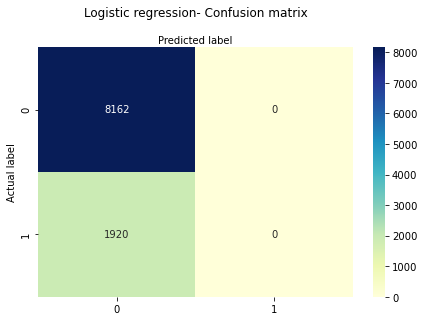

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from timeit import default_timer as timer
import time

# Plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import plot_partial_dependence
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from sklearn.utils import resample,shuffle
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt

# Define list to store result 
final_result = list()
# Define list to store result 
final_model = list()

# Instantiate a LogisticRegression classifier with default parameter values
lrc = LogisticRegression()

# Fit logreg to the train set
lrc.fit(rescaledX_train,y_train)

#Display model performance
final_model.append(model_run('Logistic regression', lrc, X=rescaledX_test, y=y_test))

<h2>4.2 Gradient Boosting</h2>

== Gradient Boosting Classifier - Classification report ==
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      8162
           1       0.60      0.05      0.09      1920

    accuracy                           0.81     10082
   macro avg       0.71      0.52      0.49     10082
weighted avg       0.77      0.81      0.74     10082



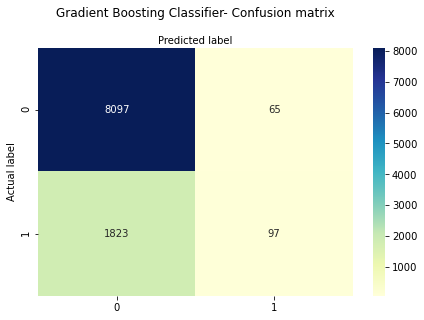

In [10]:
import matplotlib.pyplot as plt

# Instantiate a GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=42)

# Fit GradientBoostingClassifier to the train set
gbc.fit(rescaledX_train,y_train)

#Display model performance
final_model.append(model_run('Gradient Boosting Classifier', gbc, X=rescaledX_test, y=y_test))


<h2>4.2.3 Random forest</h2>

== Random Forest Classifier - Classification report ==
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      8162
           1       0.66      0.03      0.06      1920

    accuracy                           0.81     10082
   macro avg       0.74      0.51      0.48     10082
weighted avg       0.78      0.81      0.74     10082



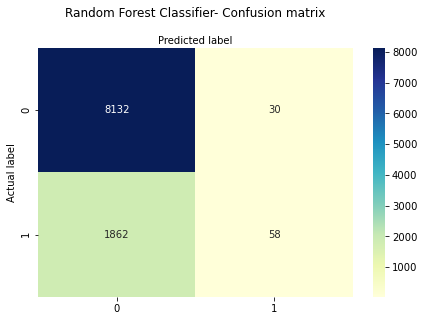

In [11]:
# Instantiate a RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=135, max_depth=6,criterion='gini', random_state=42,max_features='auto')

# Fit RandomForestClassifier to the train set
rfc.fit(rescaledX_train,y_train)

#Display model performance
final_model.append(model_run('Random Forest Classifier', rfc, X=rescaledX_test, y=y_test))

In [12]:
# Print model label
final_model_df = pd.DataFrame(final_model)
final_model_df.set_index('Model', inplace=True)

display(final_model_df)

,Accuracy,Precision,Recall
Model,,,
Logistic regression,0.80956,0.00000,0.00000
Gradient Boosting Classifier,0.81274,0.59877,0.05052
Random Forest Classifier,0.81234,0.65909,0.03021
